In [2]:
!pip install transformers
!pip install nltk
!pip install spacy
!pip install rouge-score
!pip install scikit-learn
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm


  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.4 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.2.4 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.4 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.4 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.4 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.4 which is incompatible.


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thinking1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinking1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 162.5 kB/s eta 0:01:19
     --------------------------------------- 0.0/12.8 MB 186.2 kB/s eta 0:01:09
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 403.5 kB/s eta 0:00:32
      -------------------------------------- 0.3/12.8 MB 983.0 kB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.6/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.3/12.8 MB 2.9 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.8 MB 3.4 MB/s eta 0:00:04
     ------ --------------------------------- 2.0/12.8 MB 3.7

In [3]:
import re
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from transformers import pipeline, BartForConditionalGeneration, BartTokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

from rouge_score import rouge_scorer


In [4]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text):
    # Clean text and remove stopwords
    cleaned = clean_text(text)
    tokens = nltk.word_tokenize(cleaned)
    filtered = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinking1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]


In [6]:
def tfidf_summary(text, top_n=3):
    # Vectorize the text into sentences
    sentences = nltk.sent_tokenize(text)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    sentence_scores = np.sum(tfidf_matrix.toarray(), axis=1)
    top_indices = sentence_scores.argsort()[-top_n:][::-1]
    return ' '.join([sentences[i] for i in top_indices])


In [7]:
pip install --upgrade transformers torch


Note: you may need to restart the kernel to use updated packages.


In [8]:
from transformers import pipeline, BartForConditionalGeneration, BartTokenizer


In [9]:
from transformers import pipeline

# Check if summarization pipeline loads
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
text = """The Apollo missions were a series of spaceflights undertaken by NASA to send humans to the Moon and return them safely to Earth."""
summary = bart_summarizer(text)[0]['summary_text']
print("Summary:", summary)


Device set to use cpu
Your max_length is set to 142, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Summary: The Apollo missions were a series of spaceflights undertaken by NASA to send humans to the Moon and return them safely to Earth. The Apollo missions took place between 1968 and 1972. The missions were part of a larger program to send astronauts to the moon and back. The moon was first visited by humans in 1969.


In [10]:
pip install sentencepiece


Note: you may need to restart the kernel to use updated packages.


In [11]:
# Load summarization models
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

def summarize_with_bart(text):
    return bart_summarizer(text, max_length=120, min_length=30, do_sample=False)[0]['summary_text']

def summarize_with_t5(text):
    input_ids = t5_tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    output_ids = t5_model.generate(input_ids, max_length=120, min_length=30)
    return t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

def summarize_with_pegasus(text):
    input_ids = pegasus_tokenizer(text, return_tensors="pt", truncation=True, padding="longest").input_ids
    output = pegasus_model.generate(input_ids, max_length=120, min_length=30)
    return pegasus_tokenizer.decode(output[0], skip_special_tokens=True)


Device set to use cpu


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

c:\Users\Thinking1\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thinking1\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

c:\Users\Thinking1\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thinking1\.cache\huggingface\hub\models--google--pegasus-xsum. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

In [12]:
import pandas as pd

# Load the CNN/DailyMail dataset
df = pd.read_csv("cnndaily_train.csv")
df = df[['article', 'highlights']].dropna().reset_index(drop=True)

# Grab the first article
sample_text = df.loc[0, 'article']
reference_summary = df.loc[0, 'highlights']

# Preprocess the article
preprocessed = preprocess_text(sample_text)

# Extractive methods
print("TF-IDF Summary:")
print(tfidf_summary(sample_text))

print("\nNamed Entities:")
print(extract_named_entities(sample_text))

# Abstractive methods
print("\nBART Summary:")
print(summarize_with_bart(sample_text))

print("\nT5 Summary:")
print(summarize_with_t5(sample_text))

print("\nPegasus Summary:")
print(summarize_with_pegasus(sample_text))

# Optional: Show the original highlight/summary from the dataset
print("\nReference Summary:")
print(reference_summary)


TF-IDF Summary:
The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure.

Named Entities:
[('Associated Press', 'ORG'), ('14:11 EST', 'TIME'), ('25 October 2013', 'DATE'), ('15:36 EST', 'TIME'), ('25 October 2013', 'DATE'), ('the Fargo Catholic Diocese', 'ORG'), ('North Dakota', 'GPE'), ('hundreds', 'CARDINAL'), ('Fargo', 'GPE'), ('Grand Forks', 'GPE'), ('Jamestown', 'ORG'), ('late September', 'DATE'), ('early October', 'DATE'), ('Health Department', 'ORG'), ('five', 'CARDINAL'), ('John Folda', 'PERSON'), ('the Fargo

In [13]:
from rouge_score import rouge_scorer

# Initialize scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Replace with your real generated summaries and reference
reference = reference_summary  # from your dataset
tfidf = tfidf_summary(sample_text)
bart = summarize_with_bart(sample_text)
t5 = summarize_with_t5(sample_text)
pegasus = summarize_with_pegasus(sample_text)

# Compute scores
scores = {
    'TF-IDF': scorer.score(reference, tfidf),
    'BART': scorer.score(reference, bart),
    'T5': scorer.score(reference, t5),
    'Pegasus': scorer.score(reference, pegasus)
}


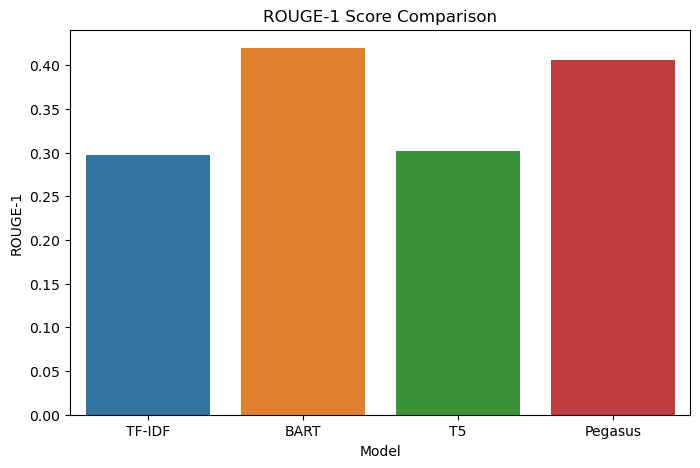

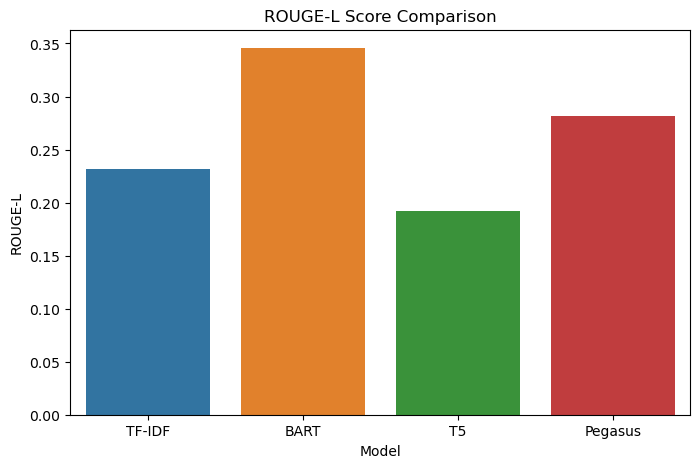

In [14]:
rouge_df = pd.DataFrame({
    'Model': scores.keys(),
    'ROUGE-1': [s['rouge1'].fmeasure for s in scores.values()],
    'ROUGE-L': [s['rougeL'].fmeasure for s in scores.values()]
})

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-1')
plt.title("ROUGE-1 Score Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-L')
plt.title("ROUGE-L Score Comparison")
plt.show()


In [15]:
#generate the output for summarized scientific papers the same way as cnn daily
import pandas as pd

# Load the scientific papers dataset
df = pd.read_csv("scientific_papers.csv")
df = df[['summary']].dropna().reset_index(drop=True)

# Create a new column that combines the title and authors with the paper content if needed
# Optional, depending on what you want to summarize. For now, we'll just summarize the abstract/summary.
sample_text = df.loc[0, 'summary']
reference_summary = df.loc[0, 'summary']  # In some datasets, summary might already be the target

# Preprocess the article
preprocessed = preprocess_text(sample_text)

# Extractive methods
print("TF-IDF Summary:")
print(tfidf_summary(sample_text))

print("\nNamed Entities:")
print(extract_named_entities(sample_text))

# Abstractive methods
print("\nBART Summary:")
print(summarize_with_bart(sample_text))

print("\nT5 Summary:")
print(summarize_with_t5(sample_text))

print("\nPegasus Summary:")
print(summarize_with_pegasus(sample_text))

# Optional: Show the original summary from the dataset
print("\nReference Summary:")
print(reference_summary)



TF-IDF Summary:
The technique developed is a variant of dependency-directed
backtracking that uses only polynomial space while still providing useful
control information and retaining the completeness guarantees provided by
earlier approaches. Because of their occasional need to return to shallow points in a search
tree, existing backtracking methods can sometimes erase meaningful progress
toward solving a search problem. In this paper, we present a method by which
backtrack points can be moved deeper in the search space, thereby avoiding this
difficulty.

Named Entities:


Your max_length is set to 120, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


[]

BART Summary:
Backtracking methods can sometimes erase meaningful progress toward solving a search problem. The technique developed is a variant of dependency-directedbacktracking that uses only polynomial space while still providing useful control information.

T5 Summary:
backtrack points can be moved deeper in the search space. the technique is a variant of dependency-directed backtracking. it provides useful control information and retaining completeness guarantees.

Pegasus Summary:
Backtracking is the process of moving information between points in a search tree in order to provide useful control and completeness over the search space. The technique developed is a variant of dependency-directed backtracking that uses only space still providing useful control and completeness guarantees.

Reference Summary:
Because of their occasional need to return to shallow points in a search
tree, existing backtracking methods can sometimes erase meaningful progress
toward solving a search

Your max_length is set to 120, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


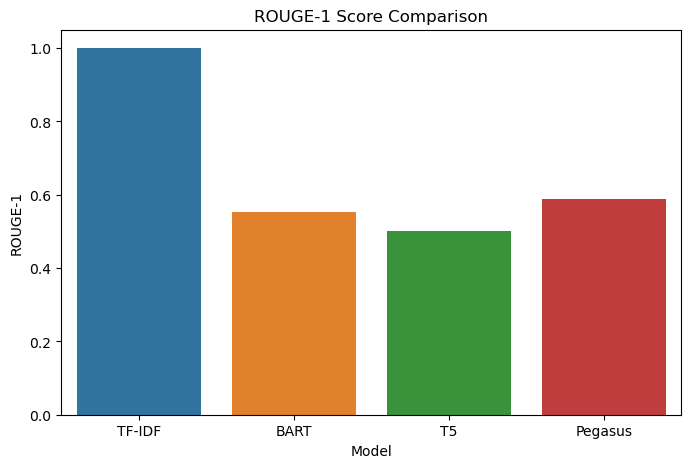

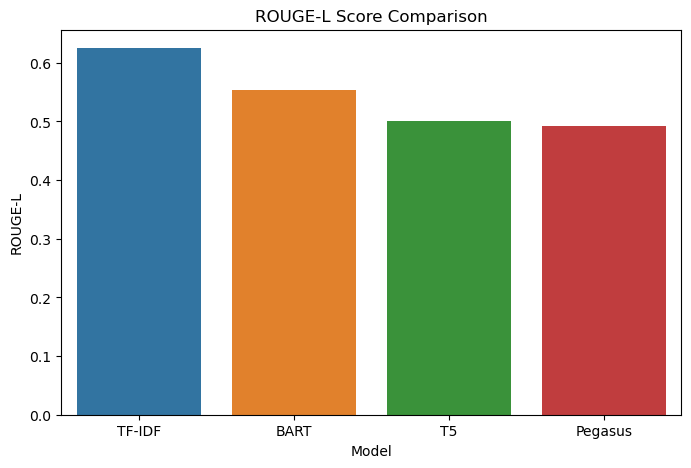

In [ ]:
#generating code to compare the rouge scores
#comment

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

reference = reference_summary  # from your dataset
tfidf = tfidf_summary(sample_text)
bart = summarize_with_bart(sample_text)
t5 = summarize_with_t5(sample_text)
pegasus = summarize_with_pegasus(sample_text)

# Compute scores
scores = {
    'TF-IDF': scorer.score(reference, tfidf),
    'BART': scorer.score(reference, bart),
    'T5': scorer.score(reference, t5),
    'Pegasus': scorer.score(reference, pegasus)
}

rouge_df = pd.DataFrame({
    'Model': scores.keys(),
    'ROUGE-1': [s['rouge1'].fmeasure for s in scores.values()],
    'ROUGE-L': [s['rougeL'].fmeasure for s in scores.values()]
})

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-1')
plt.title("ROUGE-1 Score Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-L')
plt.title("ROUGE-L Score Comparison")
plt.show()



In [32]:
import pandas as pd

#load the Mahabharata dataset
df = pd.read_csv("mahabharat_1-2.csv")
df = df[['Summary']].dropna().reset_index(drop=True)

# Create a new column that combines the title and authors with the paper content if needed
# Optional, depending on what you want to summarize. For now, we'll just summarize the abstract/summary.
sample_text = df.loc[6, 'Summary']
reference_summary = df.loc[6, 'Summary']

# Preprocess the text (you should have defined this function earlier)
preprocessed = preprocess_text(sample_text)

# Extractive methods
print("TF-IDF Summary:")
print(tfidf_summary(sample_text))

print("\nNamed Entities:")
print(extract_named_entities(sample_text))

# Abstractive methods
#print("\nBART Summary:")
#print(summarize_with_bart(sample_text))

print("\nT5 Summary:")
print(summarize_with_t5(sample_text))

print("\nPegasus Summary:")
print(summarize_with_pegasus(sample_text))

# Reference
print("\nReference Summary:")
print(reference_summary)


TF-IDF Summary:
One  after the shraddha ceremony (offering of Vishnu prasad to the forefathers) had been performed, Vyasadeva approached Satyavati and warned her, "Mother, the s of happiness in the Kuru house will set like the evening sun. Dhritarastra then requested Vidura, "O brother, we must perform the last rites for this King of kings and arrange charity to be given freely to whomever is in need. After Yudhisthira, Arjuna, Nakula, Sahadeva and Dhritarastra's sons were satiated in their swimming play, they set out for Hastinapura anticipating that Bhima had already gone there.

Named Entities:
[("King Pandu's", 'PERSON'), ('Kunti', 'FAC'), ('Pandavas', 'NORP'), ('Hastinapura', 'GPE'), ('Grandfather Bhishma', 'PERSON'), ('Kuru', 'PERSON'), ('Charanas', 'GPE'), ('Kunti', 'PERSON'), ('Hastinapura', 'GPE'), ('Kunti', 'PERSON'), ('Kuru', 'PERSON'), ('Bhishma', 'GPE'), ('Dhritarastra', 'GPE'), ('Vidura', 'PERSON'), ('Hastinapura', 'GPE'), ('Pandu', 'NORP'), ('Charanas', 'GPE'), ('Kuru', 

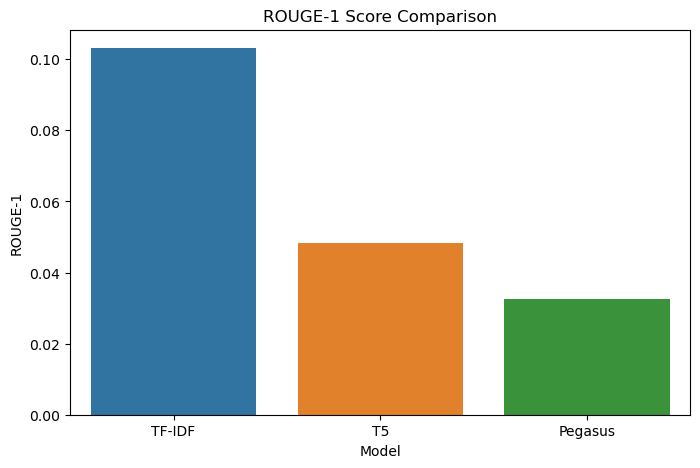

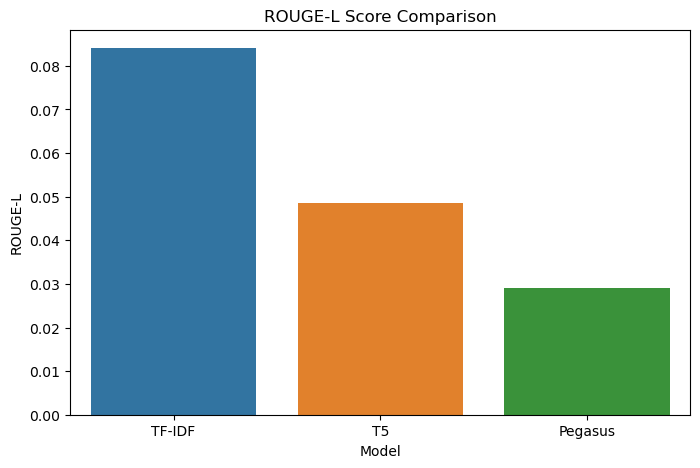

In [34]:
#generating the rouge scores

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

reference = reference_summary  # from your dataset
tfidf = tfidf_summary(sample_text)
#bart = summarize_with_bart(sample_text)
t5 = summarize_with_t5(sample_text)
pegasus = summarize_with_pegasus(sample_text)

# Compute scores
scores = {
    'TF-IDF': scorer.score(reference, tfidf),
    #'BART': scorer.score(reference, bart),
    'T5': scorer.score(reference, t5),
    'Pegasus': scorer.score(reference, pegasus)
}

rouge_df = pd.DataFrame({
    'Model': scores.keys(),
    'ROUGE-1': [s['rouge1'].fmeasure for s in scores.values()],
    'ROUGE-L': [s['rougeL'].fmeasure for s in scores.values()]
})

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-1')
plt.title("ROUGE-1 Score Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-L')
plt.title("ROUGE-L Score Comparison")
plt.show()


In [40]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline, T5ForConditionalGeneration, T5Tokenizer
import torch

# Load dataset
df = pd.read_csv("cnndaily_train.csv")
df = df[['article', 'highlights']].dropna().reset_index(drop=True)

# Grab the first article
sample_text = df.loc[0, 'article']
reference_summary = df.loc[0, 'highlights']

# --- Preprocess ---
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text.strip())  # remove excess whitespace
    text = re.sub(r'\[[^]]*\]', '', text)  # remove citations like [1]
    return text.lower()

preprocessed = preprocess_text(sample_text)

# --- Fine-Tuned TF-IDF Summary ---
def tfidf_summary(text, n_sentences=5):
    sentences = re.split(r'(?<=[.!?]) +', text)
    if len(sentences) <= n_sentences:
        return text
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
    tfidf_matrix = vectorizer.fit_transform(sentences)
    scores = tfidf_matrix.sum(axis=1).A1
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:n_sentences]
    top_indices.sort()
    return ' '.join([sentences[i] for i in top_indices])

# --- Named Entity Extraction (unchanged) ---
def extract_named_entities(text):
    ner = pipeline("ner", grouped_entities=True)
    entities = ner(text[:1000])  # limit text length for speed
    return {ent['word']: ent['entity_group'] for ent in entities}

# --- BART (unchanged, top performer) ---
def summarize_with_bart(text):
    bart = pipeline("summarization", model="facebook/bart-large-cnn")
    return bart(text[:1024], max_length=130, min_length=30, do_sample=False)[0]['summary_text']

# --- Improved T5 Parameters ---
def summarize_with_t5(text):
    model = T5ForConditionalGeneration.from_pretrained("t5-base")
    tokenizer = T5Tokenizer.from_pretrained("t5-base")
    input_text = "summarize: " + text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(
        input_ids,
        max_length=150,
        min_length=40,
        length_penalty=1.5,
        num_beams=6,
        repetition_penalty=2.5,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# --- Pegasus (unchanged) ---
def summarize_with_pegasus(text):
    pegasus = pipeline("summarization", model="google/pegasus-xsum")
    return pegasus(text[:1024], max_length=120, min_length=30, do_sample=False)[0]['summary_text']

# --------- Summarization Outputs ---------
print("TF-IDF Summary:")
print(tfidf_summary(sample_text))

print("\nNamed Entities:")
print(extract_named_entities(sample_text))

print("\nBART Summary:")
print(summarize_with_bart(sample_text))

print("\nT5 Summary (Improved):")
print(summarize_with_t5(sample_text))

print("\nPegasus Summary:")
print(summarize_with_pegasus(sample_text))

print("\nReference Summary:")
print(reference_summary)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


TF-IDF Summary:
The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in Italy last month.

Named Entities:


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

c:\Users\Thinking1\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thinking1\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Fallin

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu
c:\Users\Thinking1\anaconda3\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


{'Associated Press': 'ORG', 'Fargo Catholic Diocese': 'LOC', 'North Dakota': 'LOC', 'Fargo': 'LOC', 'Grand Forks': 'LOC', 'Jamestown': 'LOC', '##titis A': 'MISC', 'Health Department': 'ORG', 'John Folda': 'PER', 'A': 'MISC', 'Molly Howell': 'PER'}

BART Summary:


Device set to use cpu


Bishop John Folda of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion.

T5 Summary (Improved):


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

c:\Users\Thinking1\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Thinking1\.cache\huggingface\hub\models--t5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For bette

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

the bishop of the fargo Catholic . Diocese in north Dakota has exposed potentially hundreds of church members to the hepatitis . A virus in late September and early October . the risk is low, but officials feel it's important to alert people to the possible exposure .

Pegasus Summary:


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


The Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand and Jamestown to the hepatitis A virus in late September and early October.

Reference Summary:
Bishop John Folda, of North Dakota, is taking time off after being diagnosed .
He contracted the infection through contaminated food in Italy .
Church members in Fargo, Grand Forks and Jamestown could have been exposed .


In [ ]:
#improving tfidf

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def improved_tfidf_summary(text, n_sentences=5):
    stop_words = set(stopwords.words("english"))
    sentences = nltk.sent_tokenize(text)

    if len(sentences) <= n_sentences:
        return text

    # Clean sentences for TF-IDF
    cleaned_sentences = [' '.join([word.lower() for word in nltk.word_tokenize(sent)
                                   if word.isalnum() and word.lower() not in stop_words])
                         for sent in sentences]

    # TF-IDF matrix
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)
    tfidf_scores = tfidf_matrix.sum(axis=1).A1

    # Sentence position score (earlier sentences tend to be more informative in news)
    position_scores = np.array([1 / (i + 1) for i in range(len(sentences))])

    # Sentence length score (normalize between 0 and 1)
    lengths = np.array([len(sent.split()) for sent in sentences])
    length_scores = (lengths - lengths.min()) / (lengths.max() - lengths.min() + 1e-6)

    # Hybrid score (you can adjust weights here)
    combined_scores = (
        0.6 * tfidf_scores +
        0.2 * position_scores +
        0.2 * length_scores
    )

    top_indices = np.argsort(combined_scores)[-n_sentences:]
    top_indices.sort()
    return ' '.join([sentences[i] for i in top_indices])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thinking1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinking1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
print("Improved TF-IDF Summary:")
print(improved_tfidf_summary(sample_text))


Improved TF-IDF Summary:
The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in Italy last month.


Device set to use cpu
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


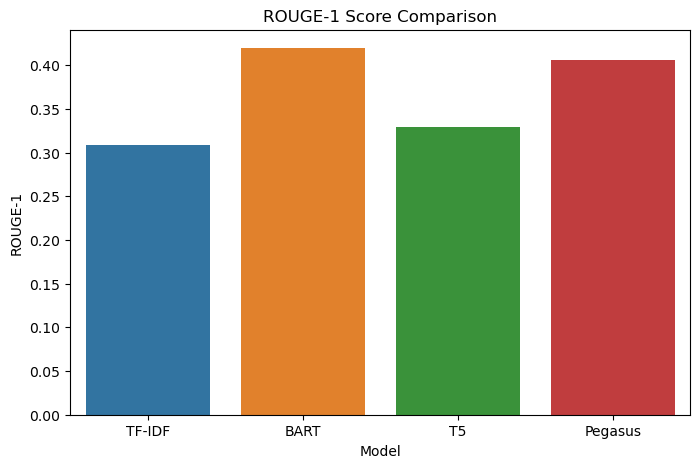

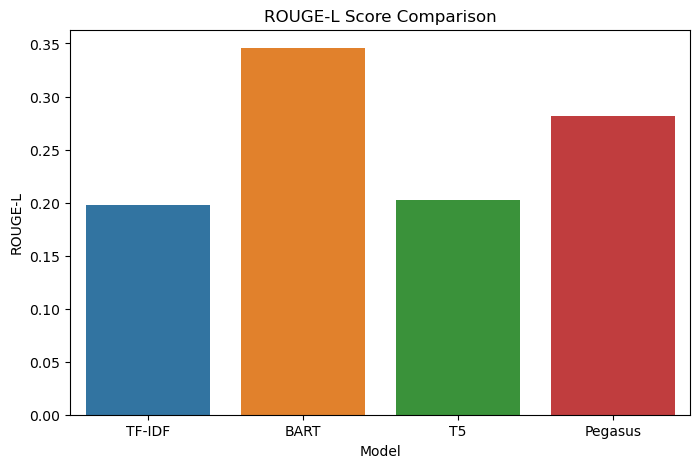

In [44]:
#generating the rouge scores

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

reference = reference_summary  # from your dataset
tfidf = tfidf_summary(sample_text)
bart = summarize_with_bart(sample_text)
t5 = summarize_with_t5(sample_text)
pegasus = summarize_with_pegasus(sample_text)

# Compute scores
scores = {
    'TF-IDF': scorer.score(reference, tfidf),
    'BART': scorer.score(reference, bart),
    'T5': scorer.score(reference, t5),
    'Pegasus': scorer.score(reference, pegasus)
}

rouge_df = pd.DataFrame({
    'Model': scores.keys(),
    'ROUGE-1': [s['rouge1'].fmeasure for s in scores.values()],
    'ROUGE-L': [s['rougeL'].fmeasure for s in scores.values()]
})

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-1')
plt.title("ROUGE-1 Score Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=rouge_df, x='Model', y='ROUGE-L')
plt.title("ROUGE-L Score Comparison")
plt.show()